# Create for study about subjects the exam


### 1) Introdução a correlação.

* Interesse em analisar o comportamento de duas variáveis quantitativas.(causa -> efeito)
* Interesse em obter uma medida estatística que indique se existe ou não associação linear entre duas variáveis; e se existe, qual a sua magnitude e sinal.
* A correlação entre duas variáveis é medida através da seguinte fómula.
    * $$
        r = \frac{\sum_{i=1}^{n} X_i Y_i - n\bar{x}\bar{y}}
        {\sqrt{\sum_{i=1}^{n} X_i^2 - n(\bar{x})^2} \sqrt{\sum_{i=1}^{n} Y_i^2 - n(\bar{y})^2}}
    $$
* No exemplo abaixo podemos observar correlações bem fortes (> 0.7 ou <-0.7) uma correlação média(|>0.3 && <0.7 | ECOR3) e duas correlações fracas( BEEF3, ABEV3 )

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
import re
import plotly.express as px


# Credenciais do banco de dados (ajuste se necessário)
DB_USER = "user_invest"
DB_PASSWORD = "senha_forte"
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'postgres'
TABLE_NAME = 'companys'
tickers_list = ["QUAL3.SA", "DASA3.SA", "HAPV3.SA", "FLRY3.SA", "ODPV3.SA", "RDOR3.SA",
    "MATD3.SA", "GNDI3.SA", "PFRM3.SA", "RADL3.SA", "HYPE3.SA", "BLAU3.SA",
    "ONCO3.SA", "AALR3.SA",
    "CCRO3.SA", "ECOR3.SA", "SBSP3.SA", "RAIL3.SA", "RENT3.SA",
    "ELET3.SA", "ENGI11.SA", "EQTL3.SA", "EGIE3.SA", "CMIG4.SA", "CPLE6.SA",
    "NEOE3.SA", "CPFE3.SA", "TAEE11.SA", "ENEV3.SA", "ISAE4.SA", "AURE3.SA",
    "AESB3.SA", "LIGT3.SA",
    "BRFS3.SA", "BEEF3.SA", "MRFG3.SA", "JBSS3.SA", "ABEV3.SA",
    "CAML3.SA", "MDIA3.SA", "SMTO3.SA",
    "^BVSP"
    ]

try:
#Cria conexão com o banco de dados postgres
    db_url = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    engine = create_engine(db_url)
    query = f"""
        SELECT data, ticker, "Fechamento" 
        FROM companys 
        WHERE ticker IN ({', '.join([f"'{t}'" for t in tickers_list])}) 
        ORDER BY data;
        """
    df = pd.read_sql(query, engine)

    df['ticker'] = df['ticker'].apply(lambda x: re.sub(r'(\.SA)$', '',x).replace('^', ''))
    #Reorganizando o dataframe para que cada ticker seja uma coluna.
    df_pivot = df.pivot_table(index='data', columns='ticker', values='Fechamento')
    #calculando as correlações das matrix.
    correlation_matrix = df_pivot.corr()

    #Pega a correlação do Ibovespa com as outras ações e ordena
    ibov_correlations = correlation_matrix['BVSP'].drop('BVSP').sort_values()
    df_plot = ibov_correlations.reset_index()
    df_plot.columns = ['Ticker', 'Correlacao']
    # Calcula a altura do gráfico com base no número de tickers
    # Isso garante que haja espaço suficiente para todos os rótulos
    plot_height = len(df_plot) * 25 + 150 
    
    # Cria o gráfico de barras dinâmico com Plotly
    fig = px.bar(
        df_plot,
        x='Correlacao',
        y='Ticker',
        orientation='h',
        title='Correlação entre o Ibovespa e Outras Ações (Fechamento)',
        labels={'Correlacao': 'Coeficiente de Correlação', 'Ticker': 'Ações'},
        color='Correlacao',
        color_continuous_scale=px.colors.sequential.Rainbow,
        hover_data={'Correlacao': ':.3f'},
        height=plot_height # Adiciona a altura calculada
    )

    # Remove o ajuste automático de texto que pode ocultar rótulos
    fig.update_layout(uniformtext_minsize=8) 

    # Exibe o gráfico diretamente na célula do Jupyter
    fig.show()
    print("Você pode interagir com o gráfico e passar o mouse sobre as barras para ver os valores.")



except Exception as e:
    print(f"Ocorreu um erro: {e}")

Você pode interagir com o gráfico e passar o mouse sobre as barras para ver os valores.


### 2) Intervalo de Confiança e Teste de Hipóteses para Correlação.
*   O coeficiente de correlação populacional é um parâmetro ou característica da população, representada pela letra grega $\rho$ e desconhecido. 
*   Dada uma amostra simples do par de variáveis aleatórias (X,Y), o coeficiente r pode ser considerado uma estimativo do verdadeiro e desconhecido coeficiente $\rho$ .
*   Podemos usar o coeficiente de correlação amostral , r , para fazer várias inferencias sobre $\rho$ .
*   Uma população que tenha duas variáveis não correlacionadas, pode produzir uma amostra com coeficiente de relação diferente de 0, simplesmente deviado a seleção dos dados.


--- Tabela de Resultados Estatísticos ---

      Ticker  Correlacao  IC_Inferior  IC_Superior       P_Valor  \
0   EGIE3.SA    0.936927     0.931931     0.941567  0.000000e+00   
1   ELET3.SA    0.934240     0.929039     0.939072  0.000000e+00   
2   CPFE3.SA    0.873056     0.863358     0.882109  0.000000e+00   
3   ENEV3.SA    0.846845     0.835321     0.857625  0.000000e+00   
4   SBSP3.SA    0.829828     0.817150     0.841704  0.000000e+00   
5   CMIG4.SA    0.821008     0.807742     0.833443  0.000000e+00   
6   SMTO3.SA    0.798159     0.783401     0.812018  0.000000e+00   
7   MRFG3.SA    0.707807     0.687590     0.726927  0.000000e+00   
8   ECOR3.SA    0.307114     0.271007     0.342357  2.972592e-55   
9   BEEF3.SA    0.093764     0.054581     0.132658  2.946389e-06   
10  ABEV3.SA   -0.164549    -0.202620    -0.125981  1.698918e-16   
11  BRFS3.SA   -0.792593    -0.806792    -0.777478  0.000000e+00   

               Significancia  
0   Significativo (p < 0.05)  
1   Signif

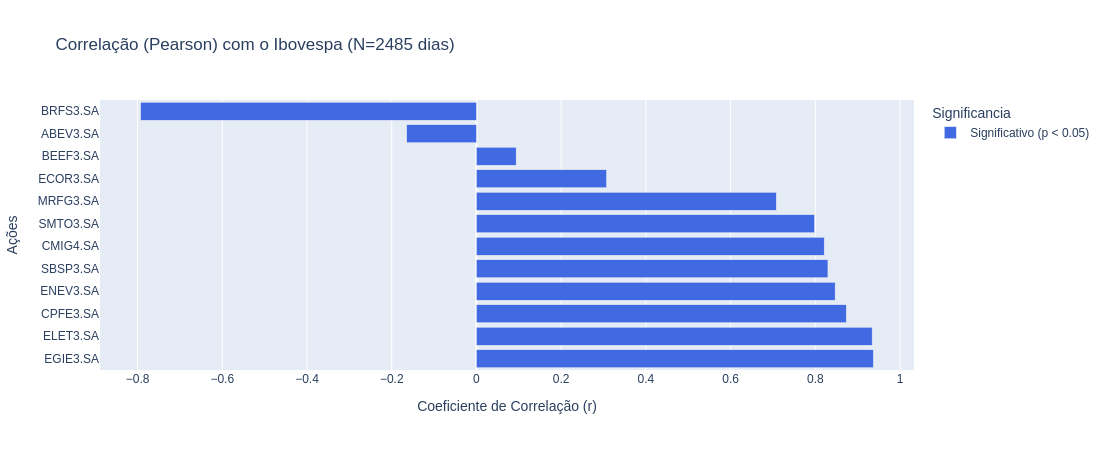

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
from sqlalchemy import create_engine
import re
import plotly.express as px

# --- FUNÇÃO DE CÁLCULO DE IC (Transformação de Fisher) ---
def calcular_ic_correlacao(r, n, nivel_confianca=0.95):
    """Calcula o IC para o coeficiente de correlação usando a Transformação de Fisher."""
    
    # Limita r para evitar erros em np.arctanh se for exatamente 1 ou -1
    r_clipped = np.clip(r, -0.99999999, 0.99999999) 
    
    # n precisa ser pelo menos 4 para que n-3 seja >= 1
    if n <= 3:
        return np.nan, np.nan 

    # 1. Transformação de Fisher (r para z)
    z = np.arctanh(r_clipped)
    
    # 2. Erro Padrão de z e Valor Z crítico
    se_z = 1 / np.sqrt(n - 3)
    alpha = 1 - nivel_confianca
    z_critico = stats.norm.ppf(1 - alpha/2)
    
    # 3. Limites do IC na escala Z
    z_lower = z - z_critico * se_z
    z_upper = z + z_critico * se_z
    
    # 4. Transformação inversa (Z de volta para r)
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    
    return r_lower, r_upper
# --------------------------------------------------------

# --- CONFIGURAÇÕES E CONEXÃO (Se necessário, mantenha no topo do notebook) ---
DB_USER = "user_invest"
DB_PASSWORD = "senha_forte"
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'postgres'
TABLE_NAME = 'companys'
IBOV_TICKER = 'BVSP'

tickers_list = ["QUAL3.SA", "DASA3.SA", "HAPV3.SA", "FLRY3.SA", "ODPV3.SA", "RDOR3.SA",
    "MATD3.SA", "GNDI3.SA", "PFRM3.SA", "RADL3.SA", "HYPE3.SA", "BLAU3.SA",
    "ONCO3.SA", "AALR3.SA",
    "CCRO3.SA", "ECOR3.SA", "SBSP3.SA", "RAIL3.SA", "RENT3.SA",
    "ELET3.SA", "ENGI11.SA", "EQTL3.SA", "EGIE3.SA", "CMIG4.SA", "CPLE6.SA",
    "NEOE3.SA", "CPFE3.SA", "TAEE11.SA", "ENEV3.SA", "ISAE4.SA", "AURE3.SA",
    "AESB3.SA", "LIGT3.SA",
    "BRFS3.SA", "BEEF3.SA", "MRFG3.SA", "JBSS3.SA", "ABEV3.SA",
    "CAML3.SA", "MDIA3.SA", "SMTO3.SA",
    "^BVSP"
    ]

try:
    # --- CONEXÃO E CARREGAMENTO DE DADOS (Início da Lógica da Célula 13) ---
    db_url = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    engine = create_engine(db_url)
    
    # 1. Carregar e pivotar os dados
    tickers_sql_list = ", ".join([f"'{t}'" for t in tickers_list])
    query = f"""
        SELECT data, ticker, "Fechamento" 
        FROM {TABLE_NAME} 
        WHERE ticker IN ({tickers_sql_list}) 
        ORDER BY data;
        """
    df = pd.read_sql(query, engine)

    # Limpeza dos nomes dos tickers
    df['ticker'] = df['ticker'].apply(lambda x: re.sub(r'(\\.SA)$', '',x).replace('^', ''))
    df_pivot = df.pivot_table(index='data', columns='ticker', values='Fechamento')
    
    OUTRAS_ACOES = [t for t in df_pivot.columns if t != IBOV_TICKER]
    N_OBSERVACOES_TOTAL = len(df_pivot)

    resultados_correlacao = []
    
    # 2. Loop para calcular as estatísticas por par
    for ticker in OUTRAS_ACOES:
        # Cria um DataFrame temporário para alinhar e remover NaNs em pares
        df_temp = pd.DataFrame({'acao': df_pivot[ticker], 'ibov': df_pivot[IBOV_TICKER]}).dropna()
        
        serie_acao_limpa = df_temp['acao']
        serie_ibov_limpa = df_temp['ibov']
        n_valido = len(serie_acao_limpa)
        
        # 3. Verificação de dados: N suficiente e não variância zero
        # Se n < 5 (ou 4 para o IC), ou se a variação de um dos ativos for zero (std() == 0),
        # o cálculo da correlação e do IC não é possível ou é inválido.
        if n_valido < 5 or serie_acao_limpa.std() == 0 or serie_ibov_limpa.std() == 0:
            resultados_correlacao.append({
                'Ticker': ticker,
                'Correlacao': np.nan,
                'P_Valor': np.nan,
                'IC_Inferior': np.nan,
                'IC_Superior': np.nan,
                'N': n_valido
            })
            continue
        
        # 4. Correlação de Pearson e p-valor
        r, p_value = stats.pearsonr(serie_acao_limpa, serie_ibov_limpa)
        
        # 5. Intervalo de Confiança
        ic_inferior, ic_superior = calcular_ic_correlacao(r, n_valido, nivel_confianca=0.95)
        
        resultados_correlacao.append({
            'Ticker': ticker,
            'Correlacao': r,
            'P_Valor': p_value,
            'IC_Inferior': ic_inferior,
            'IC_Superior': ic_superior,
            'N': n_valido
        })
    
    # 6. Criar o DataFrame final e ordenar
    df_resultados = pd.DataFrame(resultados_correlacao).sort_values(by='Correlacao', ascending=False).reset_index(drop=True)
    
    # 7. Adicionar coluna de significância
    df_resultados['Significancia'] = df_resultados['P_Valor'].apply(
        lambda p: 'Significativo (p < 0.05)' if p < 0.05 else 'Não Significativo (p ≥ 0.05)'
    )
    
    # ----------------------------------------------------------------------------------
    # EXIBIÇÃO DA TABELA E GRÁFICO (como no código original)
    # ----------------------------------------------------------------------------------
    
    print("--- Tabela de Resultados Estatísticos ---\n")
    print(df_resultados[['Ticker', 'Correlacao', 'IC_Inferior', 'IC_Superior', 'P_Valor', 'Significancia']])
    
    plot_height = len(df_resultados) * 25 + 150 
        
    fig = px.bar(
        df_resultados,
        x='Correlacao',
        y='Ticker',
        orientation='h',
        color='Significancia',
        color_discrete_map={
            'Significativo (p < 0.05)': 'royalblue', 
            'Não Significativo (p ≥ 0.05)': 'lightcoral'
        },
        title=f'Correlação (Pearson) com o Ibovespa (N={N_OBSERVACOES_TOTAL} dias)',
        labels={'Correlacao': 'Coeficiente de Correlação (r)', 'Ticker': 'Ações'},
        hover_data={
            'Correlacao': ':.3f', 
            'P_Valor': ':.4f',
            'IC_Inferior': ':.3f',
            'IC_Superior': ':.3f',
            'N': True
        },
        height=plot_height
    )
    print("\nPrimeiras linhas da coluna BVSP:")
    print(df_pivot['BVSP'].head())
    
    # Verificação 2: Quantos valores válidos (não-NaN) tem o BVSP?
    print("\nContagem de valores válidos (non-NaN) no BVSP:")
    print(df_pivot['BVSP'].count())
    
    # Verificação 3: Onde estão os NaNs? (Mostra o total de NaNs por ticker)
    print("\nTotal de NaNs por Ticker no df_pivot:")
    print(df_pivot.isnull().sum().sort_values(ascending=False))
    
    fig.update_layout(uniformtext_minsize=8)
    fig.show()
    


except Exception as e:
    print(f"Ocorreu um erro: {e}")

### 3. Entendendo os Resultados Estatísticos (Para Leigos)

Esta seção tem como objetivo traduzir a tabela e o gráfico de correlação para termos simples, explicando **o que significa** o número da correlação e **qual é a confiança** que podemos ter nesse resultado.

---

#### 📈 O Que é a Correlação? (O Coeficiente 'r')

O **Coeficiente de Correlação (r)** mede o grau de associação linear entre duas variáveis. Em termos de investimentos, ele mostra o quanto o preço de uma ação específica se move na **mesma direção** que o índice de mercado (o Ibovespa).

| Valor de 'r' | Significado | Implicação para a Ação |
| :---: | :---: | :--- |
| **Perto de +1** (Forte) | A ação acompanha o Ibovespa de perto. | Quando o mercado sobe, a ação sobe (e vice-versa). |
| **Perto de 0** (Fraca/Nula) | O movimento da ação é independente do Ibovespa. | A ação tem potencial para se comportar de forma diferente do mercado. |
| **Perto de -1** (Negativa) | A ação se move na direção oposta ao Ibovespa. | Quando o mercado sobe, a ação tende a cair (e vice-versa). |

#### 🛡️ Por Que Essa Análise é Importante?

O objetivo principal desta análise é a **Diversificação**.

Em um portfólio de investimentos, você não quer que todos os seus ativos caiam ao mesmo tempo. Analisar a correlação nos ajuda a:

* **Identificar Risco:** Ativos com correlação alta (próxima de +1) ao Ibovespa aumentam seu risco quando o mercado geral cai.
* **Buscar Diversificação:** Ativos com correlação baixa ou negativa são ideais, pois tendem a preservar valor ou até subir quando o Ibovespa cai, protegendo seu investimento.

---

#### 🧪 O Que Significam os Termos Estatísticos

Os termos na tabela ("P-Valor" e "IC") nos dão confiança de que o valor de correlação que calculamos na nossa amostra de dados não é apenas um "acaso".

**1. P-Valor (Teste de Hipóteses)**

* **O que ele testa?** Ele testa a hipótese de que a correlação real entre a ação e o Ibovespa é zero.
* **O que significa um P-Valor baixo (`< 0.05`)?** Significa que há uma chance muito pequena (menos de 5%) de que observamos essa correlação se ela fosse, na verdade, zero. Por isso, consideramos a correlação **Estatisticamente Significativa**. Ou seja, a relação é real e não aleatória.
* **O que significa um P-Valor alto (`≥ 0.05`)?** Não podemos ter certeza de que a correlação é diferente de zero; o resultado que vimos pode ter sido apenas sorte.

**2. Intervalo de Confiança (IC 95%)**

* **O que ele mostra?** O IC é uma faixa de valores (Inferior e Superior) onde esperamos que a **correlação real** (populacional) se encontre, com 95% de certeza.
* **Exemplo:** Se a correlação calculada for **0.70**, e o IC for **[0.65 a 0.75]**, temos 95% de confiança de que a correlação verdadeira está dentro dessa faixa.
* **Importante:** Se o número **zero (0)** estiver dentro desse intervalo (ex: `[-0.10 a 0.20]`), a correlação não é considerada significativa, mesmo que o `r` que calculamos seja, por exemplo, 0.15.

### Conclusão do Gráfico

* **Barras Azuis (Significativo):** Indica que a correlação é estatisticamente robusta (P-Valor < 0.05).
* **Barras Vermelhas (Não Significativo):** Indica que, embora possa haver algum valor de correlação, não há dados suficientes para provar que a

--- Resultados da Regressão Linear (Beta e Alpha) ---
      Ticker  Beta (β)  Alpha (α)  R-Quadrado   P-Valor Beta  \
0   ELET3.SA  1.274406   0.000356    0.363991  1.244793e-244   
1   ECOR3.SA  1.250783  -0.000728    0.431865  4.232068e-305   
2   CMIG4.SA  1.102910   0.000160    0.412507  3.787784e-287   
3   SBSP3.SA  0.922409   0.000399    0.365626  5.195377e-246   
4   BRFS3.SA  0.859429  -0.000606    0.216211  1.217371e-132   
5   MRFG3.SA  0.821522   0.000374    0.188186  8.461855e-114   
6   SMTO3.SA  0.736736   0.000139    0.218800  2.048320e-134   
7   ENEV3.SA  0.638788  -0.000002    0.096655   1.901381e-56   
8   CPFE3.SA  0.629359   0.000183    0.297819  1.380514e-191   
9   ABEV3.SA  0.624681  -0.000173    0.325442  4.263048e-213   
10  BEEF3.SA  0.596045  -0.000331    0.122528   4.649253e-72   
11  EGIE3.SA  0.572874   0.000142    0.359904  3.367817e-241   

   Beta Significativo  
0                 Sim  
1                 Sim  
2                 Sim  
3                

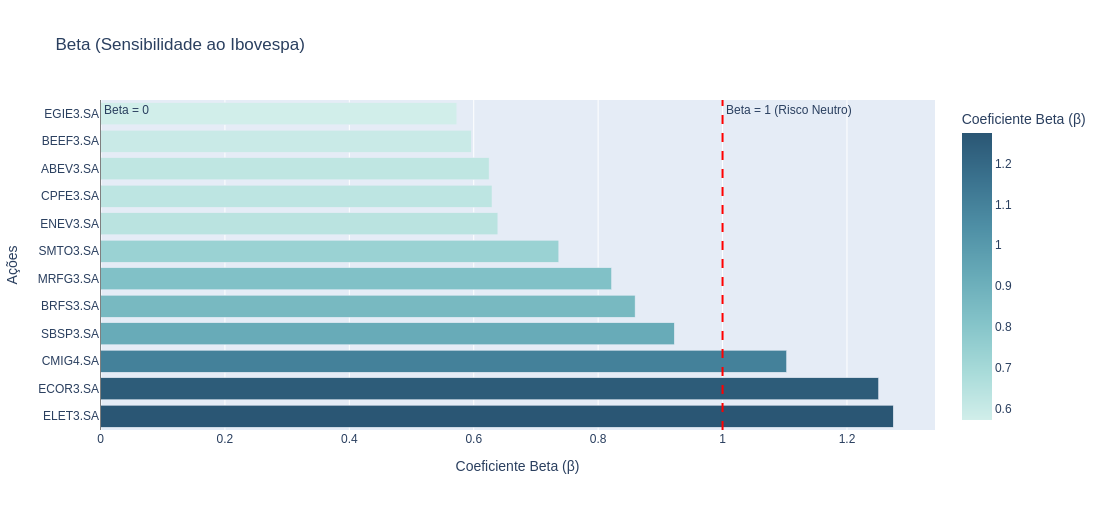

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import re

# --- CONFIGURAÇÕES E DADOS CARREGADOS DA CÉLULA MESTRA ---
# NOTA: O DataFrame 'df_pivot' deve estar disponível na memória
# após a execução da Célula 1.

IBOV_TICKER = 'BVSP' 

try:
    # 1. TRATAMENTO DE DADOS: CALCULAR RETORNOS LOGARÍTMICOS
    # O cálculo do Beta deve ser feito com retornos, e não preços.
    # Usamos o logaritmo natural para retornos, que é mais preciso para séries financeiras.
    df_returns = np.log(df_pivot / df_pivot.shift(1)).dropna()
    
    # Prepara a variável independente (X) e dependente (Y)
    X_market = df_returns[IBOV_TICKER]
    
    # 2. SEPARAR AS AÇÕES PARA REGRESSÃO
    acoes_para_analise = [col for col in df_returns.columns if col != IBOV_TICKER]
    
    resultados_regressao = []

    # 3. REALIZAR REGRESSÃO LINEAR PARA CADA AÇÃO
    for ticker in acoes_para_analise:
        Y_stock = df_returns[ticker]
        
        # Adiciona a constante (Intercepto Alpha) ao modelo de regressão
        X = sm.add_constant(X_market) 
        
        # OLS (Ordinary Least Squares) é o método da Regressão Linear
        modelo = sm.OLS(Y_stock, X).fit()
        
        # Extrair os resultados
        alpha = modelo.params['const']  # Alpha (Intercepto)
        beta = modelo.params[IBOV_TICKER]  # Beta (Coeficiente da BVSP)
        r_squared = modelo.rsquared  # R-quadrado (poder explicativo do modelo)
        p_beta = modelo.pvalues[IBOV_TICKER] # P-valor do Beta (significância)

        resultados_regressao.append({
            'Ticker': ticker,
            'Beta (β)': beta,
            'Alpha (α)': alpha,
            'R-Quadrado': r_squared,
            'P-Valor Beta': p_beta
        })

    # 4. CRIAR O DATAFRAME FINAL E ORDENAR POR BETA
    df_beta = pd.DataFrame(resultados_regressao).sort_values(by='Beta (β)', ascending=False).reset_index(drop=True)
    
    # Adicionar coluna de significância para o Beta (se p < 0.05)
    df_beta['Beta Significativo'] = df_beta['P-Valor Beta'].apply(
        lambda p: 'Sim' if p < 0.05 else 'Não'
    )
    
    # Exibir a Tabela de Resultados
    print("--- Resultados da Regressão Linear (Beta e Alpha) ---")
    print(df_beta)
    
    # 5. GERAR GRÁFICO DINÂMICO DOS BETAS
    plot_height = len(df_beta) * 30 + 150 
    
    fig = px.bar(
        df_beta,
        x='Beta (β)',
        y='Ticker',
        orientation='h',
        title='Beta (Sensibilidade ao Ibovespa)',
        labels={'Beta (β)': 'Coeficiente Beta (β)', 'Ticker': 'Ações'},
        color='Beta (β)',
        color_continuous_scale=px.colors.sequential.Teal,
        hover_data={'Beta (β)': ':.3f', 'Alpha (α)': ':.4f', 'R-Quadrado': ':.3f', 'Beta Significativo': True},
        height=plot_height
    )
    
    # Adicionar linha de referência em Beta = 1 (Risco Neutro)
    fig.add_vline(x=1, line_width=2, line_dash="dash", line_color="red", annotation_text="Beta = 1 (Risco Neutro)")
    fig.add_vline(x=0, line_width=1, line_color="gray", annotation_text="Beta = 0")
    
    fig.update_layout(uniformtext_minsize=8)
    fig.show()

except Exception as e:
    print(f"Ocorreu um erro. Certifique-se de que a Célula 1 foi executada e as bibliotecas statsmodels e plotly estão instaladas: {e}")

# 📈 Análise de Risco: Regressão Linear e o Coeficiente Beta (CAPM)

Este bloco de código implementa o **Modelo de Precificação de Ativos Financeiros (CAPM)** para determinar a relação linear entre o retorno de um ativo individual e o retorno do mercado (IBOVESPA).

$$R_i - R_f = \alpha_i + \beta_i \cdot (R_m - R_f) + \epsilon_i$$

No contexto desta regressão, que usa apenas os retornos logarítmicos e **assume o retorno livre de risco ($R_f$) como zero** para simplificação do modelo (Retorno Excesso), a fórmula se reduz a:

$$R_i = \alpha_i + \beta_i \cdot R_m + \epsilon_i$$

Onde:
* $R_i$: Retorno logarítmico da Ação (Variável Dependente).
* $R_m$: Retorno logarítmico do IBOVESPA ('BVSP') (Variável Independente).
* $\alpha_i$ **(Alpha):** O Intercepto da regressão. Representa o retorno que a ação gerou **acima** (ou abaixo) do que seria esperado pelo seu risco de mercado (Beta). É uma medida de *performance* ajustada ao risco.
* $\beta_i$ **(Beta):** O coeficiente angular (inclinação) da regressão. É a medida chave do **Risco Sistemático** (Risco de Mercado).
    * $\beta = 1$: A ação move-se exatamente com o mercado. Risco Neutro.
    * $\beta > 1$: Ação mais volátil que o mercado (Agressiva). Alto Risco Sistemático.
    * $\beta < 1$: Ação menos volátil que o mercado (Defensiva). Baixo Risco Sistemático.
* $\epsilon_i$: O erro (Resíduo), que representa o Risco Não-Sistemático (Risco Específico da Empresa).
* **R-Quadrado:** Indica a proporção da variância do retorno da ação que é explicada pela variância do retorno do IBOVESPA.

A análise é realizada utilizando o método dos **Mínimos Quadrados Ordinários (OLS)** da biblioteca `statsmodels`. O **P-Valor do Beta** é usado para verificar se a relação entre a ação e o mercado é estatisticamente **significativa** (normalmente $P < 0.05$).